# Regression with a Crab Age Dataset

## importing Libaries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib inline

## Download the dataset

In [251]:
!kaggle competitions download -c playground-series-s3e16

2023-06-08 01:32:30,361 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000178C11133D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /api/v1/competitions/data/download-all/playground-series-s3e16
2023-06-08 01:32:30,362 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000178C10FFDC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /api/v1/competitions/data/download-all/playground-series-s3e16
2023-06-08 01:32:30,363 WARNING Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000178C10FF850>: Failed to establish a new connection: [Errno 1

## Loading the dataset 

In [120]:
df = pd.read_csv('train.csv')

In [121]:
df.head(5)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [ ]:
df=df.reset_index(drop=True).set_index('id')
df.head(5)

## Splitting the data into train and test sets

In [130]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Age',axis=1), df['Age'], test_size=0.15, random_state=42)

## EDA

In [131]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile.to_notebook_iframe()

In [ ]:
df['Sex'].value_counts()

In [132]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62943 entries, 28654 to 15795
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             62943 non-null  object 
 1   Length          62943 non-null  float64
 2   Diameter        62943 non-null  float64
 3   Height          62943 non-null  float64
 4   Weight          62943 non-null  float64
 5   Shucked Weight  62943 non-null  float64
 6   Viscera Weight  62943 non-null  float64
 7   Shell Weight    62943 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


In [134]:
xtrain.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [136]:
xtrain.duplicated().sum()

0

In [137]:
# sns.pairplot(xtrain)

In [139]:
xtrain.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

C:\Users\rafay\AppData\Local\Temp\ipykernel_8468\349080965.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = xtrain.corr()


<Axes: >

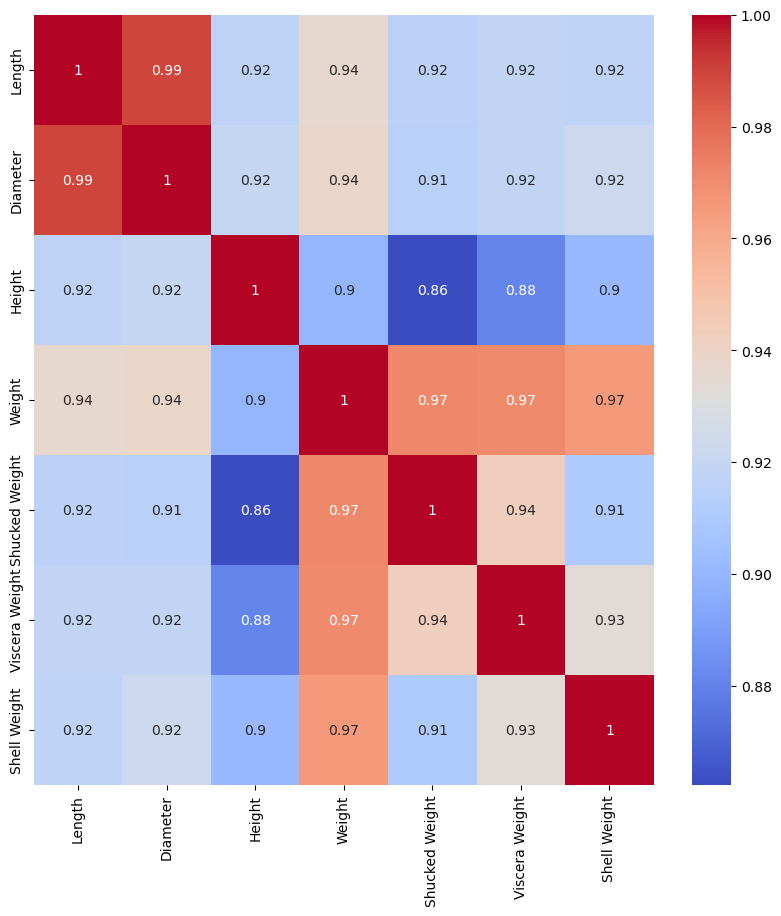

In [21]:
## Correlation Matrix
corr = xtrain.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [22]:
xtrain.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

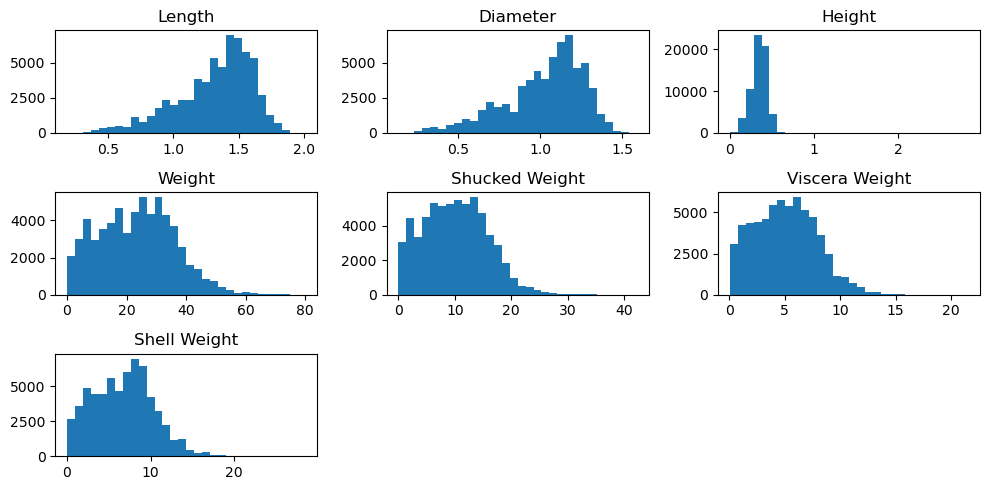

In [23]:
# creating hist plot for all the columns
plt.figure(figsize=(10,5))
cols=xtrain.columns[1:]
for i in cols:
    plt.subplot(3,3,cols.get_loc(i)+1)
    plt.title(i)
    plt.hist(xtrain[i],bins=30)
    plt.tight_layout()



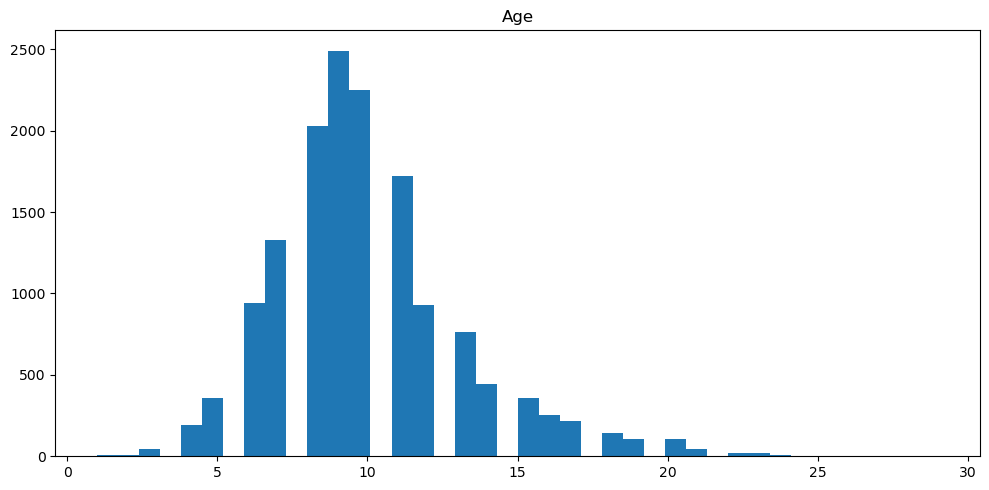

In [170]:
## plot y train
plt.figure(figsize=(10,5))
plt.title('Age')
plt.hist(ytrain,bins=40)
plt.tight_layout()


In [110]:
# feature importance
from sklearn.ensemble import RandomForestRegressor

# convert categorical to numerical
ft_train=pd.get_dummies(xtrain)
    
feat_model = RandomForestRegressor()

feat_model.fit(ft_train,ytrain)


RandomForestRegressor()

<Axes: ylabel='Features'>

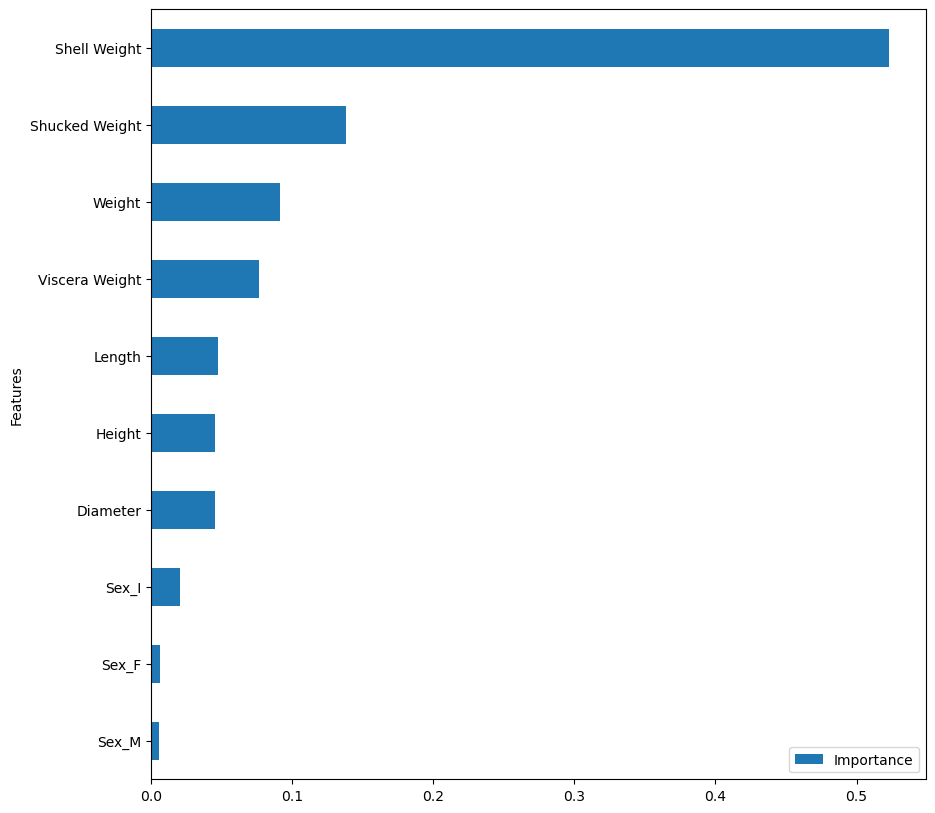

In [111]:
# extract feature importance
feat_imp = pd.DataFrame({'Features':ft_train.columns,'Importance':feat_model.feature_importances_})
feat_imp.sort_values(by='Importance').reset_index(drop=True).set_index('Features').plot(kind='barh',figsize=(10,10))

In [24]:
feat_imp.sort_values(by='Importance',ascending=False)

NameError: name 'feat_imp' is not defined

## Preprocessing

In [82]:
xtrain.head(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
33184,I,1.1875,0.8875,0.325,14.004653,6.562909,3.175144,4.394172
42716,F,1.6750,1.3000,0.325,44.111822,19.065039,10.602713,12.757275
32282,M,1.3750,1.0375,0.350,18.710670,7.796112,4.890289,5.386405
23307,F,1.4375,1.1250,0.375,22.920571,10.716111,4.422522,6.236890
68173,M,1.5125,1.1750,0.375,30.872605,13.919605,6.321938,8.646598


In [140]:
# creating new features
def create_features(data):
    data["volume"] = data["Height"] * data["Diameter"] * data["Length"]
    data["dim1"] = data["Height"] * data["Diameter"] 
    data["dim2"] = data["Height"] * data["Length"] 
    data["dim3"] = data["Diameter"] * data["Length"]
    data["total_weight"] = data["Shell Weight"] + data["Viscera Weight"] + data["Shucked Weight"]
    data["weight_volume_ratio"] = data["Weight"] / (data["Diameter"] + 1e-8 )
    data["shell_to_total_weight"] = data["Shell Weight"] / data["Weight"]
    data["viscera_to_total_weight"] = data["Viscera Weight"] / data["Weight"]
    data["shucked_to_total_weight"] = data["Shucked Weight"] / data["Weight"]
    
    # convert the features to float
    data["volume"] = data["volume"].astype(float)
    data["dim1"] = data["dim1"].astype(float)
    data["dim2"] = data["dim2"].astype(float)
    data["dim3"] = data["dim3"].astype(float)
    data["total_weight"] = data["total_weight"].astype(float)
    data["weight_volume_ratio"] = data["weight_volume_ratio"].astype(float)
    data["shell_to_total_weight"] = data["shell_to_total_weight"].astype(float)
    data["viscera_to_total_weight"] = data["viscera_to_total_weight"].astype(float)
    data["shucked_to_total_weight"] = data["shucked_to_total_weight"].astype(float)

    
    return data

xtrain = create_features(xtrain)
xtest = create_features(xtest)
    

In [142]:
# getting categorical columns
categorical_columns=xtrain.select_dtypes(include='object').columns

In [144]:
categorical_columns

Index(['Sex'], dtype='object')

In [145]:
# getting numerical columns
numerical_columns=xtrain.select_dtypes(exclude='object').columns
numerical_columns=numerical_columns.to_list()
numerical_columns

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'volume',
 'dim1',
 'dim2',
 'dim3',
 'total_weight',
 'weight_volume_ratio',
 'shell_to_total_weight',
 'viscera_to_total_weight',
 'shucked_to_total_weight']

In [149]:
# scaling and encoding the data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,RobustScaler

mct=make_column_transformer( 
                            (MinMaxScaler(),numerical_columns),
                            (OneHotEncoder(sparse=False,handle_unknown='ignore'),categorical_columns))

In [150]:
mct.fit(xtrain)
xtrain=mct.transform(xtrain)
xtest=mct.transform(xtest)

c:\Users\rafay\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [151]:
xtrain.shape,ytrain.shape

((62943, 19), (62943,))

In [155]:
def mae(x_test,y_test,model):
    return {'simple: ':np.mean(abs(model.predict(x_test)-y_test)),
"Rounded: ":np.mean(abs(model.predict(x_test).round()-y_test)),
"truncated: ":np.mean(abs(np.trunc(model.predict(x_test))-y_test))}

## XGBoost

In [35]:
from xgboost import XGBRegressor


xgb_params = {'objective': 'reg:pseudohubererror',
                'tree_method': 'hist',
                'colsample_bytree': 0.9,
                'gamma': 0.65,
                'learning_rate': 0.01,
                'max_depth': 7,
                'min_child_weight': 20,
                'n_estimators': 1500,
                'subsample': 0.7,
                'random_state': 42,
                'n_jobs': -1}
    

model = XGBRegressor(**xgb_params)

model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.65, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=-1, num_parallel_tree=None,
             objective='reg:pseudohubererror', predictor=None, ...)

In [36]:
model.score(xtrain,ytrain)

0.6231249046860545

In [37]:
model.score(xtest,ytest)

0.583724649890967

In [38]:
mae(xtest,ytest,model)

{'simple: ': 1.367521306873441,
 'Rounded: ': 1.3407454087144401,
 'truncated: ': 1.3953006841915736}

## Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42,n_estimators=500, n_jobs=-1)

model.fit(xtrain,ytrain)


RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [120]:
print(model.score(xtrain,ytrain))


0.9405447747592026


In [121]:
print(model.score(xtest,ytest))

0.57511481331422


In [122]:
mae(xtest,ytest,model)

{'simple: ': 1.4531765579636755,
 'Rounded: ': 1.4306934035514145,
 'truncated: ': 1.4095604618189184}

## Logistic Regression

In [317]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(xtrain,ytrain)

LinearRegression()

In [318]:
lr.score(xtrain,ytrain)

0.5400522076784898

In [319]:
lr.score(xtest,ytest)

0.5568646401179169

In [320]:
lr_mae=np.mean(abs(lr.predict(xtest)-ytest))

lr_mae

1.4919881600071332

## LAD Regression

In [123]:
from sklego.linear_model import LADRegression

In [137]:
lad = LADRegression()

lad.fit(xtrain,ytrain)

LADRegression()

In [138]:
lad.score(xtrain,ytrain)

0.5349506428193911

In [139]:
lad.score(xtest,ytest)

0.5430228702349532

In [140]:
mae(xtest,ytest,lad)

{'simple: ': 1.4320999820807119,
 'Rounded: ': 1.405847005603943,
 'truncated: ': 1.4820066167038013}

## CatBoost

In [42]:
from catboost import CatBoostRegressor

cbr=CatBoostRegressor(random_state=42,verbose=1,loss_function='MAE',eval_metric='MAE',iterations=12000)

cbr.fit(xtrain,ytrain)

0:	learn: 2.2307595	total: 247ms	remaining: 4m 6s
1:	learn: 2.1444171	total: 293ms	remaining: 2m 26s
2:	learn: 2.0682985	total: 329ms	remaining: 1m 49s
3:	learn: 1.9941062	total: 364ms	remaining: 1m 30s
4:	learn: 1.9315803	total: 399ms	remaining: 1m 19s
5:	learn: 1.8831688	total: 435ms	remaining: 1m 12s
6:	learn: 1.8368904	total: 472ms	remaining: 1m 6s
7:	learn: 1.7950824	total: 515ms	remaining: 1m 3s
8:	learn: 1.7575624	total: 558ms	remaining: 1m 1s
9:	learn: 1.7227875	total: 595ms	remaining: 58.9s
10:	learn: 1.6924093	total: 628ms	remaining: 56.5s
11:	learn: 1.6640629	total: 662ms	remaining: 54.5s
12:	learn: 1.6387683	total: 698ms	remaining: 53s
13:	learn: 1.6224998	total: 740ms	remaining: 52.1s
14:	learn: 1.5971377	total: 780ms	remaining: 51.2s
15:	learn: 1.5765421	total: 814ms	remaining: 50.1s
16:	learn: 1.5553791	total: 851ms	remaining: 49.2s
17:	learn: 1.5365165	total: 884ms	remaining: 48.2s
18:	learn: 1.5195011	total: 923ms	remaining: 47.6s
19:	learn: 1.5035945	total: 971ms	rema

In [43]:
cbr.score(xtrain,ytrain)

0.62017760234003

In [44]:
cbr.score(xtest,ytest)

0.5750367610139822

In [45]:
len(xtrain)

62943

In [47]:
mae(xtest,ytest,cbr)

{'simple: ': 1.3607937219920156,
 'Rounded: ': 1.3427259632697155,
 'truncated: ': 1.4296903132877206}

## LightGBM

In [39]:
from lightgbm import LGBMRegressor

lgb_params={'objective': 'mae',
            'n_estimators': 1000,
            'max_depth': 15,
            'learning_rate': 0.01,
            'num_leaves': 105,
            'reg_alpha': 8,
            'reg_lambda': 3,
            'subsample': 0.6,
            'colsample_bytree': 0.8,
            'random_state': 42,
            'n_jobs': -1}


lgb=LGBMRegressor(**lgb_params)
lgb.fit(xtrain,ytrain)


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, max_depth=15,
              n_estimators=1000, num_leaves=105, objective='mae',
              random_state=42, reg_alpha=8, reg_lambda=3, subsample=0.6)

In [40]:
lgb.score(xtest,ytest)

0.5755946636817624

In [41]:
mae(xtest,ytest,lgb)

{'simple: ': 1.3536787023600356,
 'Rounded: ': 1.3438062657544112,
 'truncated: ': 1.4192473892689954}

## Voting Classifier

In [61]:
from sklearn.ensemble import VotingRegressor
    
vc = VotingRegressor([('xgboost',XGBRegressor(**xgb_params)),
                            ('rf',LGBMRegressor(random_state=42,objective='mae',n_estimators=5000,n_jobs=-1,learning_rate=0.01)),
                            ('cbr',CatBoostRegressor(random_state=42,verbose=1,loss_function='MAE',eval_metric='MAE',iterations=15000))],n_jobs=-1)

vc.fit(xtrain,ytrain)


KeyboardInterrupt: 

In [ ]:
vc.score(xtrain,ytrain)

0.6228658526095449

In [ ]:
vc.score(xtest,ytest)

0.5793246641400351

In [53]:
mae(xtest,ytest,vc)

{'simple: ': 1.361615601041235,
 'Rounded: ': 1.3444737019782593,
 'truncated: ': 1.4269124299507123}

## Hist Gradient Boosting

In [34]:
# import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
hist_md = HistGradientBoostingRegressor(loss = 'absolute_error',
                                        l2_regularization = 0.01,
                                        early_stopping = False,
                                        learning_rate = 0.01,
                                        max_iter = 1000,
                                        max_depth = 15,
                                        max_bins = 255,
                                        min_samples_leaf = 70,
                                        max_leaf_nodes = 115)

hist_md.fit(xtrain,ytrain)
  

HistGradientBoostingRegressor(early_stopping=False, l2_regularization=0.01,
                              learning_rate=0.01, loss='absolute_error',
                              max_depth=15, max_iter=1000, max_leaf_nodes=115,
                              min_samples_leaf=70)

In [35]:
hist_md.score(xtrain,ytrain)

0.5915922871184427

In [36]:
hist_md.score(xtest,ytest)

0.5715508844936399

In [37]:
mae(xtest,ytest,hist_md)

{'simple: ': 1.358604869282316,
 'Rounded: ': 1.3471371984155565,
 'truncated: ': 1.431850918257112}

## Stacking

In [235]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklego.linear_model import LADRegression
from sklearn.ensemble import HistGradientBoostingRegressor
xgb_params = {'objective': 'reg:pseudohubererror',
            'tree_method': 'hist',
            'colsample_bytree': 0.9,
            'gamma': 0.65,
            'learning_rate': 0.01,
            'max_depth': 7,
            'min_child_weight': 20,
            'n_estimators': 1500,
            'subsample': 0.7,
            'random_state': 42,
            'n_jobs': -1}

hist_params={'loss': 'absolute_error',
            'l2_regularization': 0.01,
            'early_stopping': False,
            'learning_rate': 0.01,
            'max_iter': 1000,
            'max_depth': 15,
            'max_bins': 255,
            'min_samples_leaf': 70,
            'max_leaf_nodes': 115}

lgb_params={'objective': 'mae',
            'n_estimators': 1000,
            'max_depth': 15,
            'learning_rate': 0.01,
            'num_leaves': 105,
            'reg_alpha': 8,
            'reg_lambda': 3,
            'subsample': 0.6,
            'colsample_bytree': 0.8,
            'random_state': 42,
            'n_jobs': -1}

#CatBoostRegressor(random_state=42,verbose=1,loss_function='MAE',eval_metric='MAE',iterations=12000)
sr = StackingRegressor([('xgboost',XGBRegressor(**xgb_params)),
                            ('lgbm',LGBMRegressor(**lgb_params)),
                            ('cbr',CatBoostRegressor(random_state=42,verbose=1,loss_function='MAE',eval_metric='MAE',iterations=12000)),
                            ('hist',HistGradientBoostingRegressor(**hist_params))],
                       final_estimator=LADRegression(positive=False,fit_intercept=False),n_jobs=-1,verbose=2)

sr.fit(xtrain,ytrain)    

KeyboardInterrupt: 

In [231]:
sr.score(xtrain,ytrain)

0.6174614504939802

In [232]:
sr.score(xtest,ytest)

0.5803020534186838

In [233]:
preds=sr.predict(xtest)
pd.DataFrame(preds).apply(np.mean, axis = 0)

0    9.696362
dtype: float32

In [234]:
mae(xtest,ytest,sr)

{'simple: ': 1.3690758500976616,
 'Rounded: ': 1.3464169967590927,
 'truncated: ': 1.3996218941303564}

## Submission

In [218]:
submission = pd.read_csv('test.csv')

In [219]:
submission.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [220]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


In [221]:
id=submission['id']
data=submission.drop('id',axis=1)

In [222]:
data = create_features(data)

In [223]:
data=mct.transform(data)

In [224]:
data.shape

(49368, 19)

In [225]:
cbr_pred=sr.predict(data)    

In [226]:
submission_df=pd.DataFrame({'id':id,'Age':cbr_pred.round()})

In [227]:
submission_df.head()

,id,Age
0,74051,7.0
1,74052,8.0
2,74053,11.0
3,74054,10.0
4,74055,7.0


In [228]:
submission_df.to_csv('submission.csv',index=False)

In [229]:
!kaggle competitions submit -c playground-series-s3e16 -f submission.csv -m "first"

Successfully submitted to Regression with a Crab Age Dataset



  0%|          | 0.00/579k [00:00<?, ?B/s]
  1%|▏         | 8.00k/579k [00:00<00:23, 24.4kB/s]
 15%|█▌        | 88.0k/579k [00:00<00:02, 242kB/s] 
 22%|██▏       | 128k/579k [00:00<00:01, 248kB/s] 
 35%|███▍      | 200k/579k [00:00<00:01, 355kB/s]
 43%|████▎     | 248k/579k [00:00<00:01, 287kB/s]
 50%|████▉     | 288k/579k [00:01<00:01, 265kB/s]
 55%|█████▌    | 320k/579k [00:01<00:01, 222kB/s]
 61%|██████    | 352k/579k [00:01<00:01, 214kB/s]
 65%|██████▍   | 376k/579k [00:01<00:00, 208kB/s]
 69%|██████▉   | 400k/579k [00:01<00:00, 209kB/s]
 73%|███████▎  | 424k/579k [00:01<00:00, 203kB/s]
 77%|███████▋  | 448k/579k [00:02<00:00, 206kB/s]
 82%|████████▏ | 472k/579k [00:02<00:00, 210kB/s]
 86%|████████▌ | 496k/579k [00:02<00:00, 218kB/s]
 90%|████████▉ | 520k/579k [00:02<00:00, 218kB/s]
 95%|█████████▌| 552k/579k [00:02<00:00, 228kB/s]
 99%|█████████▉| 576k/579k [00:02<00:00, 220kB/s]
100%|██████████| 579k/579k [00:03<00:00, 152kB/s]
